# Linear Regression Analyses

In [1]:
import statsmodels.formula.api as smf

from scripts.utils import *
from funcs.linear_models import *
from funcs.plots import *

### Load and concatenate data

In [2]:
# set path
data_path = get_path('dataframes')

In [3]:
threshold_data = pd.read_pickle(os.path.join(data_path, 'thresholds-100_freqs.pkl'))[
    ['participant', 'paradigm', 'pred', 'mean_threshold']].drop_duplicates()

p50_data = pd.read_pickle(os.path.join(data_path, 'sigmoid_data.pkl'))[
    ['participant', 'paradigm', 'pred', 'distance_p50']].drop_duplicates()

FAR_data = pd.read_pickle(os.path.join(data_path, 'false_alarm_rates.pkl'))[
    ['participant', 'paradigm', 'pred', 'false_alarm_rate']].drop_duplicates()

gmsi_data = load_gmsi_results()

age = load_age_info()

In [4]:
# Merge everything
all_data = pd.merge(threshold_data, p50_data, on=['paradigm', 'pred', 'participant'])
all_data = pd.merge(all_data, FAR_data, on=['paradigm', 'pred', 'participant'])
all_data = pd.merge(all_data, gmsi_data, on='participant')
all_data = pd.merge(all_data, age, on='participant')

In [5]:
# Keep only data from Continuous and Cluster
cc_data = all_data[all_data.paradigm.isin(['Continuous', 'Cluster'])].__deepcopy__()

### Decisional bias

##### Effect on thresholds


---CONTINUOUS---
R : R2: 0.004, p = 0.744   
T : R2: 0.01 , p = 0.616   
F : R2: 0.001, p = 0.85    
FT: R2: 0.093, p = 0.114   

---CLUSTER---
R : R2: 0.002, p = 0.837   
T : R2: 0.006, p = 0.693   
F : R2: 0.151, p = 0.041   *
FT: R2: 0.008, p = 0.653   


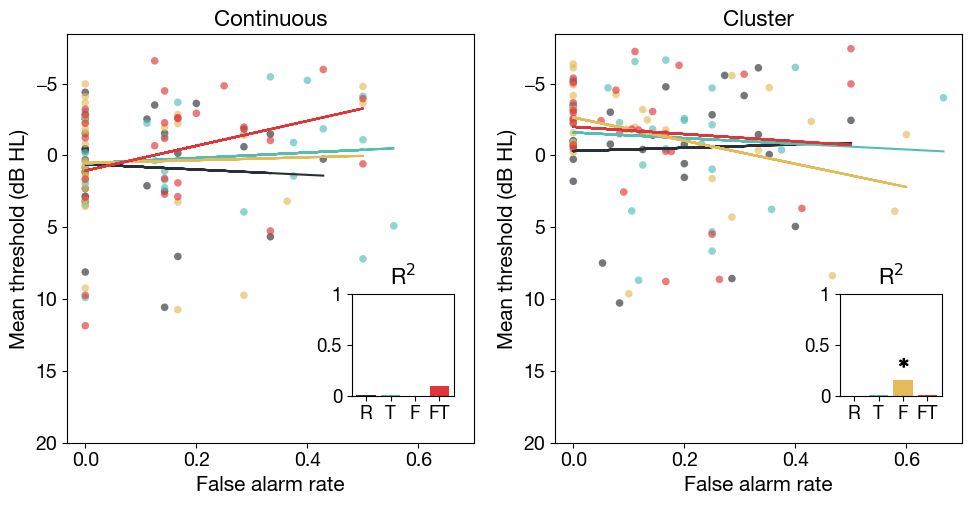

In [6]:
r_values = RSquared().compute_and_report_r_squared(cc_data, 'false_alarm_rate', 'mean_threshold')

fig = Fig4p50().plot_linear_regression(cc_data, 'false_alarm_rate', 'mean_threshold', r_values, ['False alarm rate', 'Mean threshold (dB HL)'])

##### Effect on the difference in threshold with the random condition

In [7]:
data_diff = compute_difference_w_random(cc_data)


---CONTINUOUS---
T : R2: 0.151, p = 0.041   *
F : R2: 0.042, p = 0.297   
FT: R2: 0.237, p = 0.009   *

---CLUSTER---
T : R2: 0.051, p = 0.249   
F : R2: 0.0  , p = 0.995   
FT: R2: 0.004, p = 0.754   


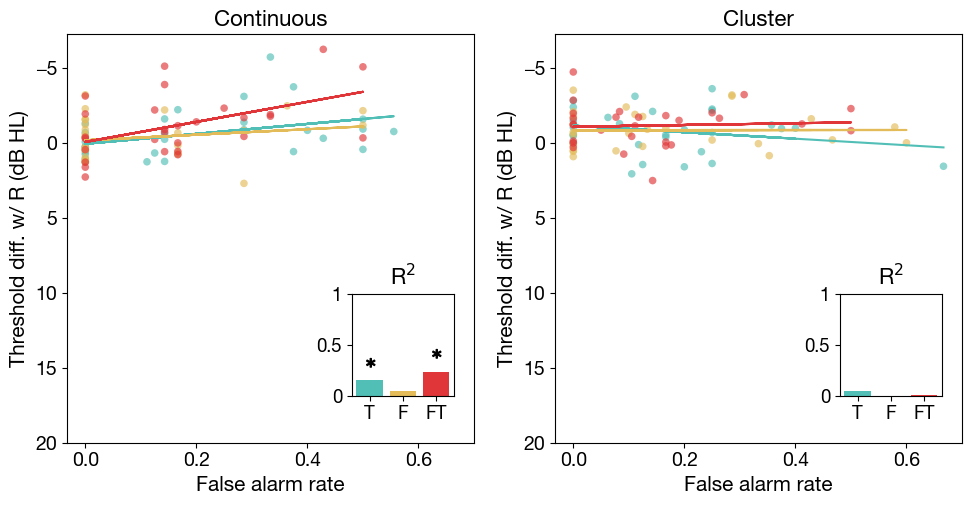

In [8]:
r_values = RSquared().compute_and_report_r_squared(data_diff, 'false_alarm_rate', 'threshold_diff')

fig = Fig4p50().plot_linear_regression(data_diff, 'false_alarm_rate', 'threshold_diff', r_values, ['False alarm rate', 'Threshold diff. w/ R (dB HL)'])

##### Effect on p50s

In [9]:
data_noNan = remove_nan_participants(cc_data)


---CONTINUOUS---
R : R2: 0.01 , p = 0.616   
T : R2: 0.114, p = 0.079   
F : R2: 0.126, p = 0.064   
FT: R2: 0.394, p < 0.001   *

---CLUSTER---
R : R2: 0.116, p = 0.075   
T : R2: 0.051, p = 0.247   
F : R2: 0.026, p = 0.408   
FT: R2: 0.051, p = 0.246   


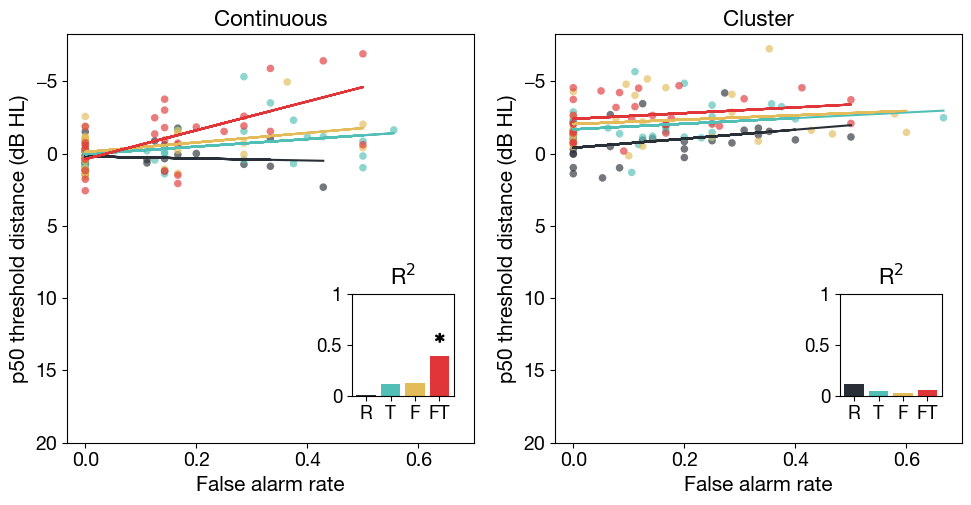

In [10]:
# Compute R2
r_values = RSquared().compute_and_report_r_squared(data_noNan, 'false_alarm_rate', 'distance_p50')

fig = Fig4p50().plot_linear_regression(data_noNan, 'false_alarm_rate', 'distance_p50', r_values, ['False alarm rate', 'p50 threshold distance (dB HL)'])

fig.savefig(os.path.join(get_path('figures'), 'Fig4D-corr_p50_FAR.svg'))

##### Effect on the p50 difference with the random condition


---CONTINUOUS---
T : R2: 0.106, p = 0.092   
F : R2: 0.103, p = 0.096   
FT: R2: 0.313, p = 0.002   *

---CLUSTER---
T : R2: 0.02 , p = 0.469   
F : R2: 0.003, p = 0.8     
FT: R2: 0.029, p = 0.387   


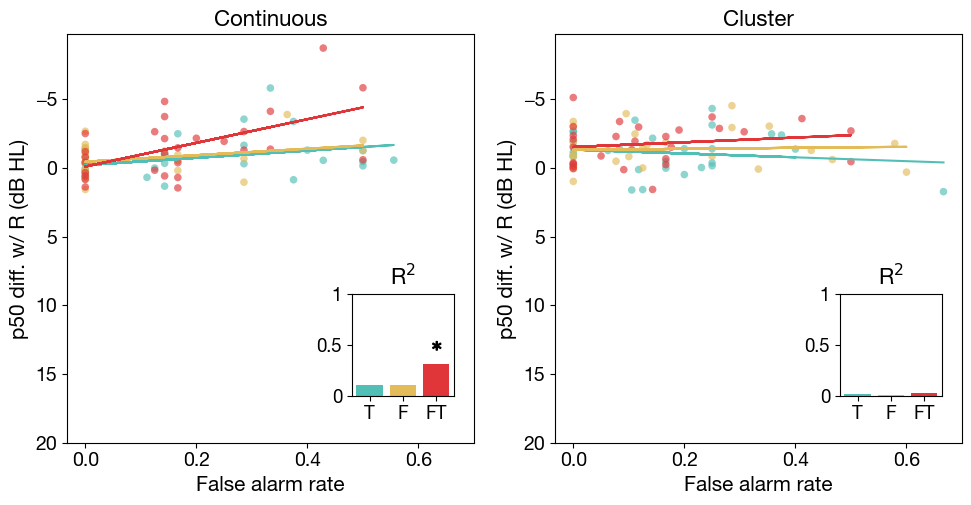

In [11]:
data_diff_noNan = remove_nan_participants(data_diff)

r_values = RSquared().compute_and_report_r_squared(data_diff_noNan, 'false_alarm_rate', 'p50_diff')

fig = Fig4p50().plot_linear_regression(data_diff_noNan, 'false_alarm_rate', 'p50_diff', r_values, ['False alarm rate', 'p50 diff. w/ R (dB HL)'])

### Musical sophistication

##### Effect on thresholds


---CONTINUOUS---
R : R2: 0.139, p = 0.05    
T : R2: 0.151, p = 0.041   *
F : R2: 0.138, p = 0.052   
FT: R2: 0.13 , p = 0.059   

---CLUSTER---
R : R2: 0.137, p = 0.052   
T : R2: 0.152, p = 0.04    *
F : R2: 0.22 , p = 0.012   *
FT: R2: 0.19 , p = 0.02    *


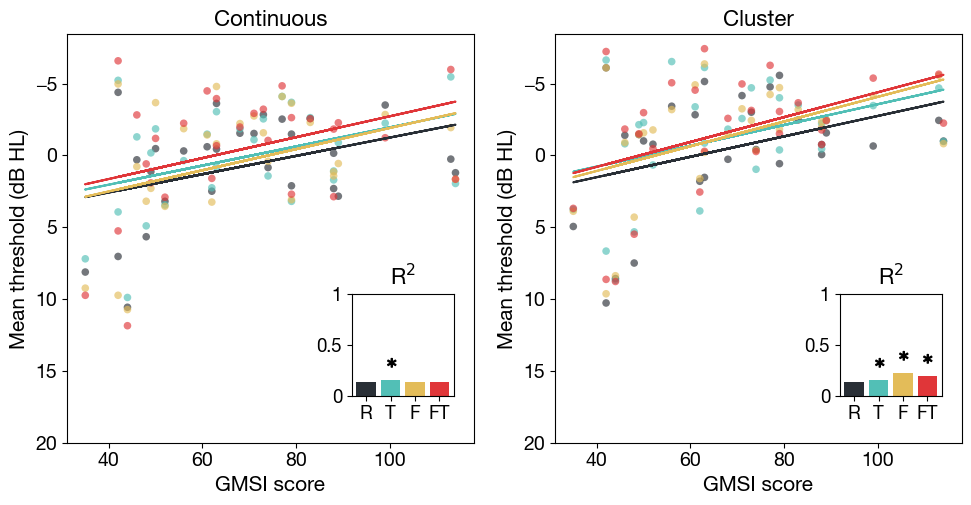

In [12]:
r_values = RSquared().compute_and_report_r_squared(cc_data, 'gmsi', 'mean_threshold')

fig = Fig4p50().plot_linear_regression(cc_data, 'gmsi', 'mean_threshold', r_values, ['GMSI score', 'Mean threshold (dB HL)'])

##### Effect on the difference in threshold with the random condition


---CONTINUOUS---
T : R2: 0.001, p = 0.854   
F : R2: 0.021, p = 0.457   
FT: R2: 0.008, p = 0.641   

---CLUSTER---
T : R2: 0.0  , p = 0.929   
F : R2: 0.064, p = 0.195   
FT: R2: 0.056, p = 0.227   


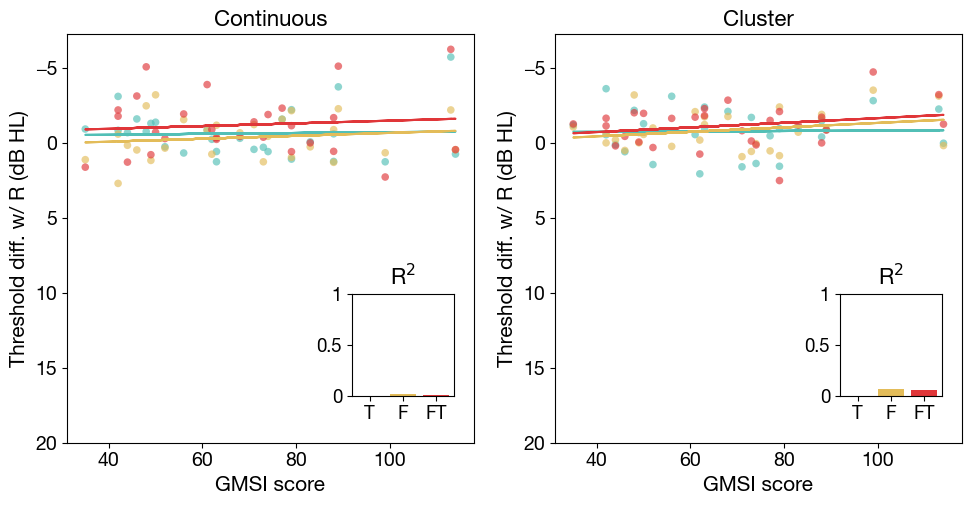

In [13]:
r_values = RSquared().compute_and_report_r_squared(data_diff, 'gmsi', 'threshold_diff')

fig = Fig4p50().plot_linear_regression(data_diff, 'gmsi', 'threshold_diff', r_values, ['GMSI score', 'Threshold diff. w/ R (dB HL)'])

##### Effect on p50s


---CONTINUOUS---
R : R2: 0.026, p = 0.416   
T : R2: 0.002, p = 0.827   
F : R2: 0.023, p = 0.437   
FT: R2: 0.003, p = 0.776   

---CLUSTER---
R : R2: 0.017, p = 0.507   
T : R2: 0.001, p = 0.861   
F : R2: 0.061, p = 0.203   
FT: R2: 0.008, p = 0.652   


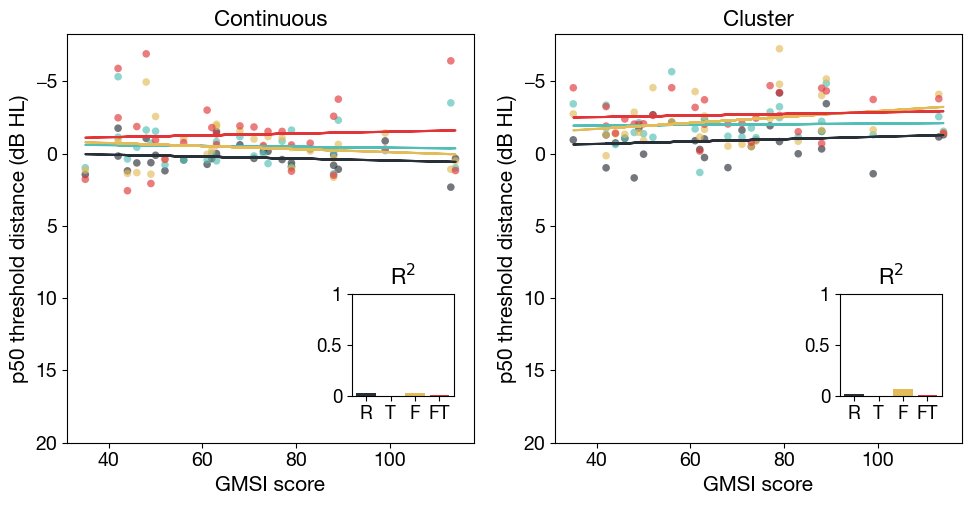

In [14]:
# Compute R2
r_values = RSquared().compute_and_report_r_squared(data_noNan, 'gmsi', 'distance_p50')

fig = Fig4p50().plot_linear_regression(data_noNan, 'gmsi', 'distance_p50', r_values, ['GMSI score', 'p50 threshold distance (dB HL)'])

fig.savefig(os.path.join(get_path('figures'), 'Fig5B-corr_p50_GMSI.svg'))

##### Effect on the p50 difference with the random condition


---CONTINUOUS---
T : R2: 0.003, p = 0.796   
F : R2: 0.005, p = 0.722   
FT: R2: 0.014, p = 0.545   

---CLUSTER---
T : R2: 0.007, p = 0.669   
F : R2: 0.035, p = 0.341   
FT: R2: 0.002, p = 0.84    


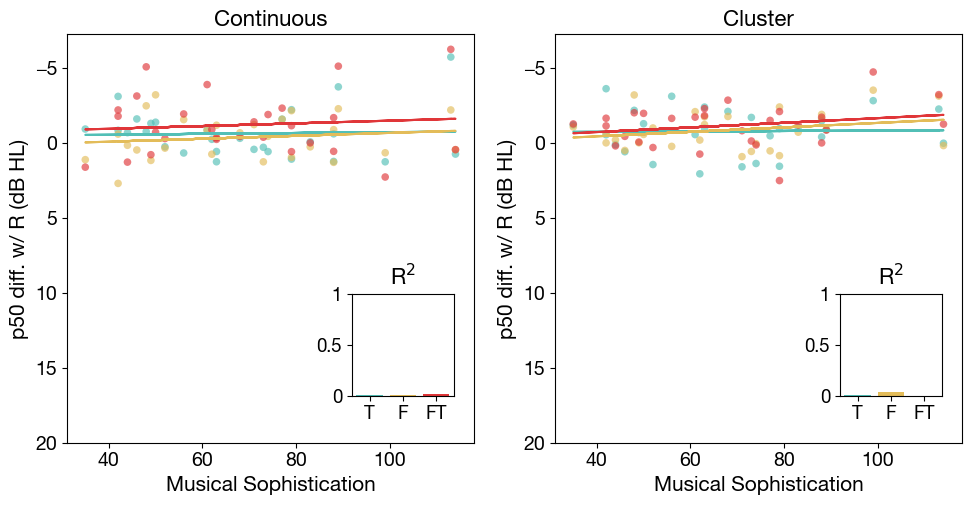

In [15]:
r_values = RSquared().compute_and_report_r_squared(data_diff_noNan, 'gmsi', 'p50_diff')

fig = Fig4p50().plot_linear_regression(data_diff_noNan, 'gmsi', 'threshold_diff', r_values, ['Musical Sophistication', 'p50 diff. w/ R (dB HL)'])

### Age

##### Effect on thresholds


---CONTINUOUS---
R : R2: 0.09 , p = 0.12    
T : R2: 0.086, p = 0.129   
F : R2: 0.061, p = 0.205   
FT: R2: 0.085, p = 0.132   

---CLUSTER---
R : R2: 0.16 , p = 0.035   *
T : R2: 0.19 , p = 0.02    *
F : R2: 0.093, p = 0.114   
FT: R2: 0.102, p = 0.097   


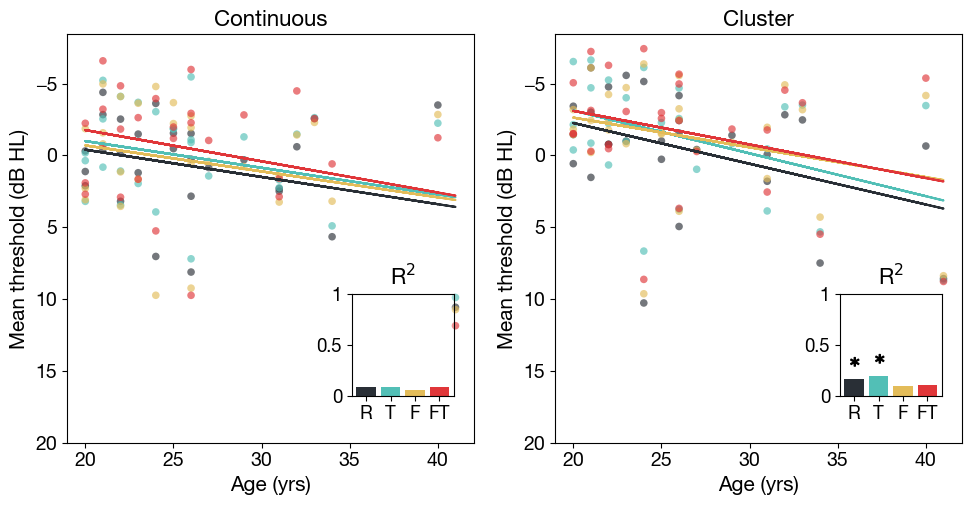

In [16]:
r_values = RSquared().compute_and_report_r_squared(cc_data, 'age', 'mean_threshold')

fig = Fig4p50().plot_linear_regression(cc_data, 'age', 'mean_threshold', r_values, ['Age (yrs)', 'Mean threshold (dB HL)'])

##### Effect on the difference in threshold with the random condition


---CONTINUOUS---
T : R2: 0.0  , p = 0.947   
F : R2: 0.001, p = 0.856   
FT: R2: 0.006, p = 0.697   

---CLUSTER---
T : R2: 0.003, p = 0.78    
F : R2: 0.123, p = 0.067   
FT: R2: 0.042, p = 0.296   


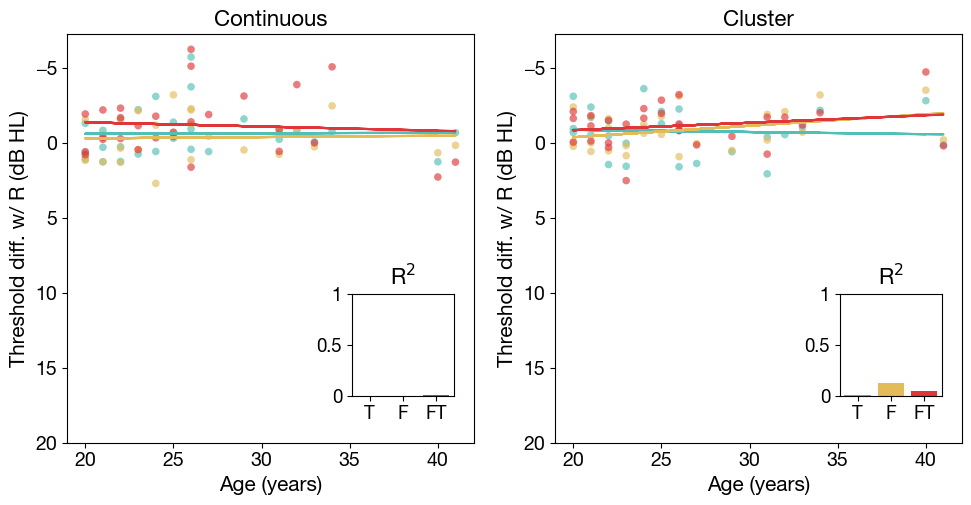

In [17]:
r_values = RSquared().compute_and_report_r_squared(data_diff, 'age', 'threshold_diff')

fig = Fig4p50().plot_linear_regression(data_diff, 'age', 'threshold_diff', r_values, ['Age (years)', 'Threshold diff. w/ R (dB HL)'])

##### Effect on p50s


---CONTINUOUS---
R : R2: 0.001, p = 0.879   
T : R2: 0.001, p = 0.872   
F : R2: 0.008, p = 0.658   
FT: R2: 0.0  , p = 0.915   

---CLUSTER---
R : R2: 0.154, p = 0.039   *
T : R2: 0.226, p = 0.011   *
F : R2: 0.007, p = 0.68    
FT: R2: 0.011, p = 0.601   


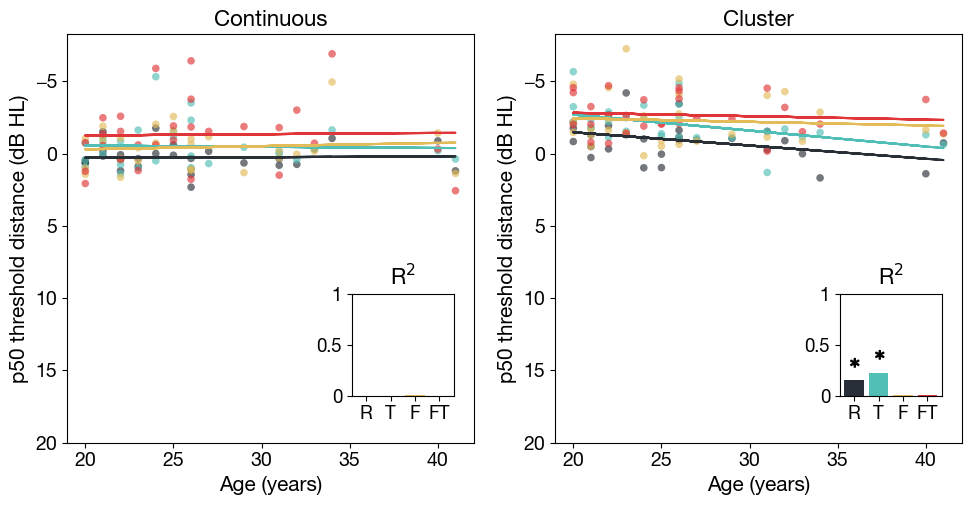

In [18]:
# Compute R2
r_values = RSquared().compute_and_report_r_squared(data_noNan, 'age', 'distance_p50')

fig = Fig4p50().plot_linear_regression(data_noNan, 'age', 'distance_p50', r_values, ['Age (years)', 'p50 threshold distance (dB HL)'])

fig.savefig(os.path.join(get_path('figures'), 'Fig5A-corr_p50_age.svg'))

##### Effect on the p50 difference with the random condition


---CONTINUOUS---
T : R2: 0.002, p = 0.809   
F : R2: 0.008, p = 0.657   
FT: R2: 0.0  , p = 0.958   

---CLUSTER---
T : R2: 0.005, p = 0.72    
F : R2: 0.076, p = 0.157   
FT: R2: 0.069, p = 0.178   


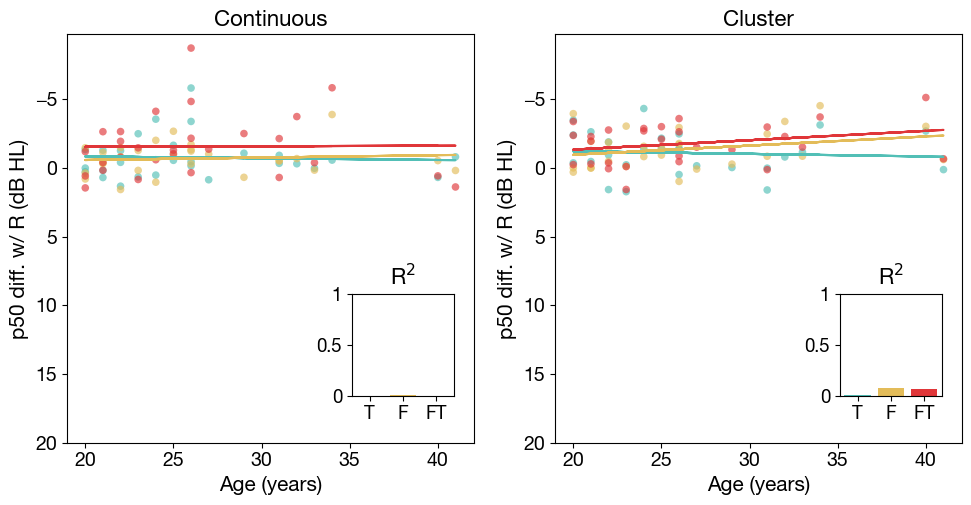

In [19]:
r_values = RSquared().compute_and_report_r_squared(data_diff_noNan, 'age', 'p50_diff')

fig = Fig4p50().plot_linear_regression(data_diff_noNan, 'age', 'p50_diff', r_values, ['Age (years)', 'p50 diff. w/ R (dB HL)'])

### LMM on the thresholds

#### Fit Linear Mixed Model

In [20]:
data = copy.deepcopy(all_data)

# sort categories to set reference level
map_task = {'Continuous': '0_Continuous', 'Cluster': 'Cluster'}
data['paradigm'] = data['paradigm'].map(map_task)
map_pred = {'none': '1_R', 'time': '2_T', 'frequency': '3_F', 'both': '4_FT'}
data['pred'] = data['pred'].map(map_pred)


# Fit a mixed effects model
model = smf.mixedlm("mean_threshold ~ paradigm*pred + false_alarm_rate + age + gmsi + age*gmsi + false_alarm_rate*gmsi", data, groups=data['participant'])

# Fit model and print results
result = model.fit()
print(result.summary())

# Predicted values
data['predicted'] = result.fittedvalues

# Residuals
data['residuals'] = result.resid

                    Mixed Linear Model Regression Results
Model:                   MixedLM      Dependent Variable:      mean_threshold
No. Observations:        224          Method:                  REML          
No. Groups:              28           Scale:                   1.6252        
Min. group size:         8            Log-Likelihood:          -432.1034     
Max. group size:         8            Converged:               Yes           
Mean group size:         8.0                                                 
-----------------------------------------------------------------------------
                                  Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
-----------------------------------------------------------------------------
Intercept                        -19.817    9.133 -2.170 0.030 -37.718 -1.917
paradigm[T.Cluster]               -1.086    0.344 -3.160 0.002  -1.759 -0.412
pred[T.2_T]                       -0.285    0.350 -0.816 0.415  -0.970  0.400
pred[T

### Check assumptions

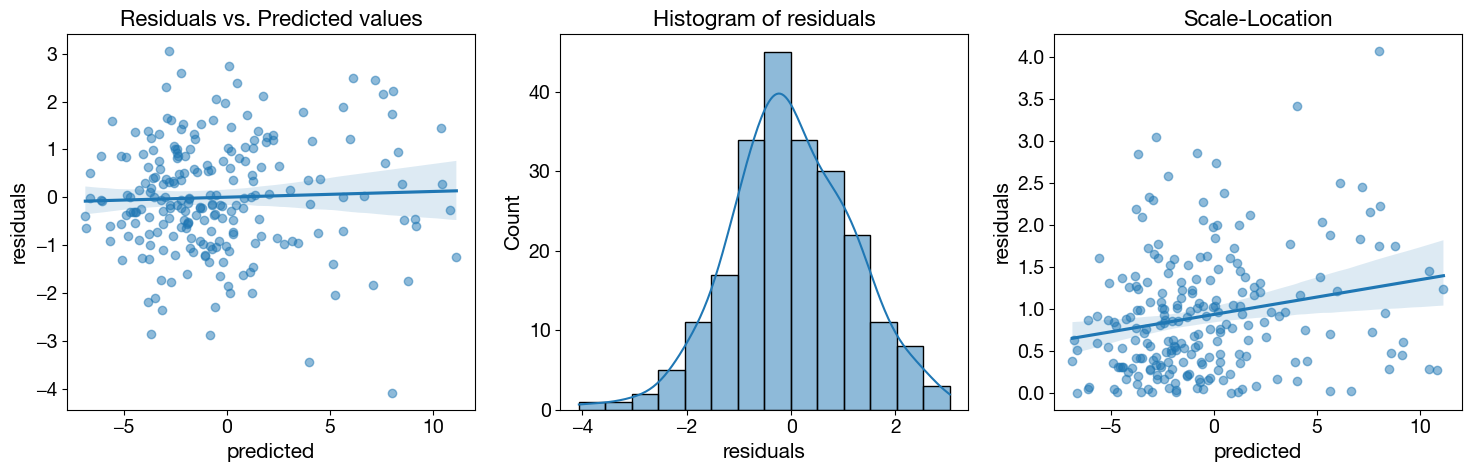

In [21]:
from funcs.plots import SupplPlots

SupplPlots.lmm_assumptions(data)

### Interaction of Age and Musical Sophistication

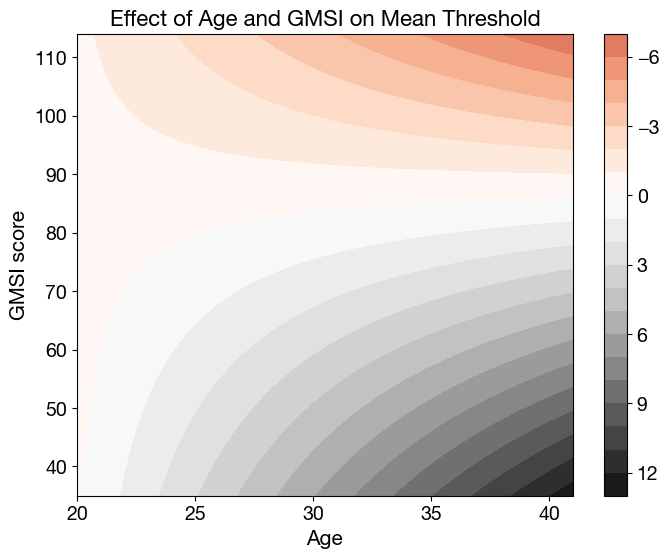

In [24]:
# create a grid
age_range = np.linspace(min(data['age']), max(data['age']), num=100)
gmsi_range = np.linspace(min(data['gmsi']), max(data['gmsi']), num=100)
age_grid, gmsi_grid = np.meshgrid(age_range, gmsi_range)

# calculate the predicted values
z = result.params['Intercept'] + result.params['age'] * age_grid + result.params['gmsi'] * gmsi_grid + result.params['age:gmsi'] * age_grid * gmsi_grid


plt.figure(figsize=(8,6))
contour = plt.contourf(age_grid, gmsi_grid, z, 20, cmap='RdGy')

# Compute your boundaries maxima
boundary_max = max(abs(np.array(z).min()), np.array(z).max())

contour.set_clim(-boundary_max, boundary_max)  # Here is the crucial line

cbar = plt.colorbar(contour)
cbar.ax.invert_yaxis()

plt.title('Effect of Age and GMSI on Mean Threshold')
plt.xlabel('Age')
plt.ylabel('GMSI score')
plt.show()

####

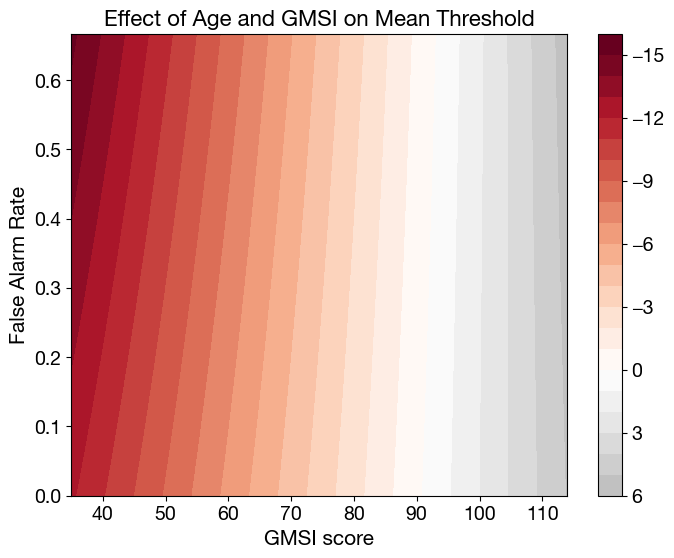

In [25]:
# create the grid
far_range = np.linspace(min(data['false_alarm_rate']), max(data['false_alarm_rate']), num=100)
gmsi_range = np.linspace(min(data['gmsi']), max(data['gmsi']), num=100)
gmsi_grid, far_grid = np.meshgrid(gmsi_range, far_range)

# calculate the predicted values
z = result.params['Intercept'] + result.params['false_alarm_rate'] * far_grid + result.params['gmsi'] * gmsi_grid + result.params['false_alarm_rate:gmsi'] * far_grid * gmsi_grid


# contour plot
plt.figure(figsize=(8,6))
contour = plt.contourf(gmsi_grid, far_grid, z, 20, cmap='RdGy')
boundary_max = max(abs(np.array(z).min()), np.array(z).max())
contour.set_clim(-boundary_max, boundary_max)  # Here is the crucial line

cbar = plt.colorbar(contour)
cbar.ax.invert_yaxis()

plt.title('Effect of Age and GMSI on Mean Threshold')
plt.xlabel('GMSI score')
plt.ylabel('False Alarm Rate')
plt.show()


### LMM on the p50s

#### Fit Linear Mixed Model

In [27]:
data = copy.deepcopy(all_data)

# sort categories to set reference level
map_task = {'Continuous': '0_Continuous', 'Cluster': 'Cluster'}
data['paradigm'] = data['paradigm'].map(map_task)
map_pred = {'none': '1_R', 'time': '2_T', 'frequency': '3_F', 'both': '4_FT'}
data['pred'] = data['pred'].map(map_pred)


# Fit a mixed effects model
model = smf.mixedlm("distance_p50 ~ paradigm + pred + false_alarm_rate + age + gmsi + age*gmsi + false_alarm_rate*gmsi", data, groups=data['participant'])

# Fit model and print results
result = model.fit()
print(result.summary())

# Predicted values
data['predicted'] = result.fittedvalues

# Residuals
data['residuals'] = result.resid

/Users/nadou/opt/anaconda3/envs/ThereWillBeBeeps/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/nadou/opt/anaconda3/envs/ThereWillBeBeeps/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/Users/nadou/opt/anaconda3/envs/ThereWillBeBeeps/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/nadou/opt/anaconda3/envs/ThereWillBeBeeps/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(


             Mixed Linear Model Regression Results
Model:              MixedLM   Dependent Variable:   distance_p50
No. Observations:   224       Method:               REML        
No. Groups:         28        Scale:                1.8704      
Min. group size:    8         Log-Likelihood:       -416.3170   
Max. group size:    8         Converged:            No          
Mean group size:    8.0                                         
----------------------------------------------------------------
                      Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------
Intercept             -1.727    2.526 -0.684 0.494 -6.678  3.224
paradigm[T.Cluster]   -1.421    0.184 -7.736 0.000 -1.781 -1.061
pred[T.2_T]           -0.745    0.262 -2.840 0.005 -1.260 -0.231
pred[T.3_F]           -1.021    0.260 -3.929 0.000 -1.530 -0.512
pred[T.4_FT]          -1.591    0.259 -6.137 0.000 -2.099 -1.083
false_alarm_rate      -4.432    2.309 -

/Users/nadou/opt/anaconda3/envs/ThereWillBeBeeps/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/nadou/opt/anaconda3/envs/ThereWillBeBeeps/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2206: ConvergenceWarning: MixedLM optimization failed, trying a different optimizer may help.
  warnings.warn(msg, ConvergenceWarning)
/Users/nadou/opt/anaconda3/envs/ThereWillBeBeeps/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2218: ConvergenceWarning: Gradient optimization failed, |grad| = 11.062983
  warnings.warn(msg, ConvergenceWarning)
